### $$\hat H \psi = E \psi \Leftrightarrow -\frac{\hbar^2}{2m} \frac{d^2 \psi }{dx^2} = E \psi $$

# Méthode numérique

In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#creating the grid
a = 2
N = 600
x = np.linspace(0,a,N+1)
Delta_x = x[1]-x[0]

#constants AMU
hbar = 1
m = 1

# Calcul de la dérivée numérique

$$ \hat H = -\frac{\hbar^2}{2m} \frac{d^2 \psi}{dx^2} \approx -\frac{\hbar^2}{2m} \frac 1{(\Delta x)^2} \begin{pmatrix} 
    -2 & 1 & 0 & 0& \dots \\
    1 & -2 & 1 & 0&\dots \\
    0 & 1 & -2 & 1 & \dots \\ 
    \vdots & \ddots & \ddots& \ddots &\dots \\
    0 & \dots & \dots  & 0 & 1 &-2 \\
    \end{pmatrix} \begin{pmatrix} \psi(x_1) \\ \psi(x_2) \\ \dots \\ \dots \\ \psi(x_{N-1}) \end{pmatrix}$$

In [20]:
# Création de la matrice de dérivation
M = np.diag(-2*np.ones(N-1)) + np.diag(np.ones(N-2),1)+ np.diag(np.ones(N-2),-1)
print(M)
print(M.shape)

[[-2.  1.  0. ...  0.  0.  0.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]
 [ 0.  0.  0. ...  0.  1. -2.]]
(599, 599)


In [21]:
# Hamiltonien
H = -hbar**2/(2*m)* 1/(Delta_x)**2 * M

# Résolution de l'équation
E, psi = np.linalg.eigh(H)

In [22]:
psi = psi.T

In [23]:
print("Dim de psi:", psi.shape)

Dim de psi: (599, 599)


# Normalisation

### $$\int_{x_1}^{x_N} f(x) dx \approx \sum_{i=1}^N f(x_i) \Delta x $$

In [14]:
def integral(f, axis=0):
    return np.sum(f*Delta_x, axis=axis)

# Calcul de la norme
norms = integral(psi**2)

# Normalisation
psi = psi/np.sqrt(norms)

### $$\int_{-\infty}^{\infty} |\psi_n(x)|^2 dx =1$$

In [15]:
integral(psi**2)[5]

1.0000000000000002

In [24]:
# Dimensions
print("Dim de x:", x.shape)
print("Dim de psi:", psi.shape)

Dim de x: (601,)
Dim de psi: (599, 599)


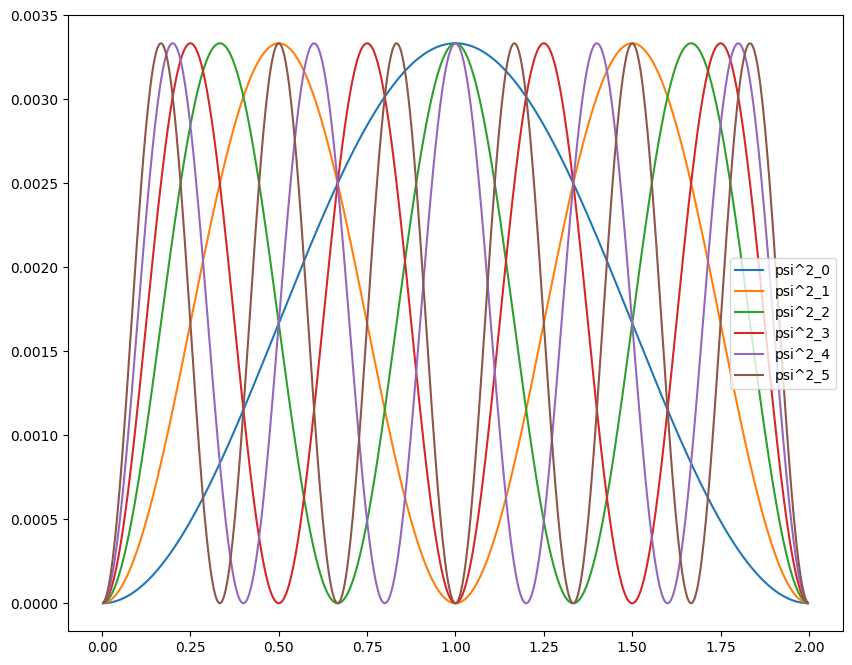

In [25]:
plt.figure(figsize=(10,8))

for n in range(0,6):
    
    plt.plot(x[1:-1], psi[n]**2, label = 'psi^2_{}'.format(n))
    plt.legend()

# Solution Exacte

### $$\psi_n=\sqrt{\frac{2}{a}}\sin \bigg (\frac{n \pi x}{a} \bigg )$$
### $$n=1,2,\cdots,6$$

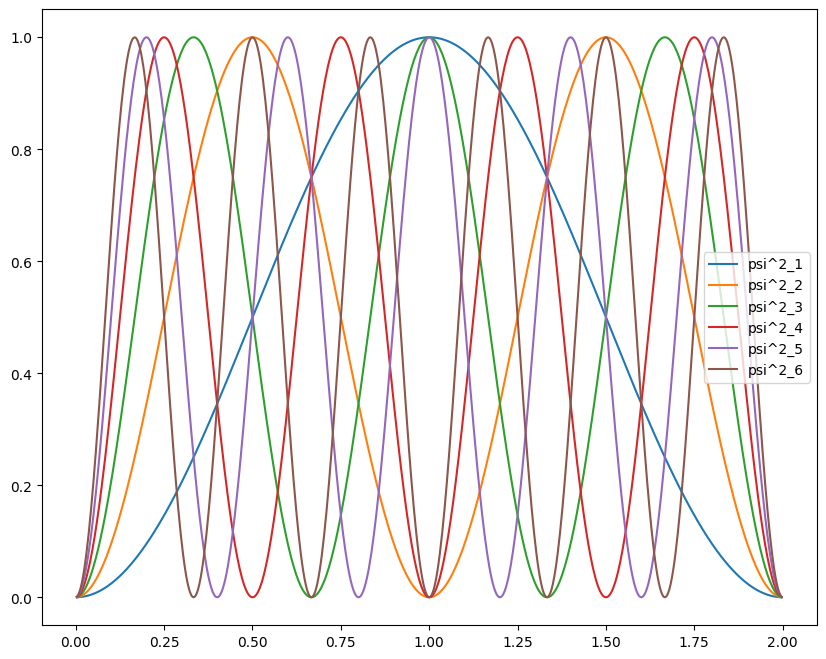

In [10]:
def true_psi(n,x):
    
    return np.sqrt(2/a)*np.sin(n*np.pi*x/a)


plt.figure(figsize=(10,8))

for n in range(1,7):
    
    plt.plot(x[1:-1], true_psi(n, x[1:-1])**2, label = 'psi^2_{}'.format(n))
    plt.legend()

In [26]:
# Comparaison de l'énergie obtenue avec l'énergie exacte'

def energy(n):
    
    return hbar**2 * np.pi**2 * n**2/(2*m*a**2)

def relative_error(theo, obs):
    
    return abs( (theo-obs)/theo)*100


for n in range(0,6):
    
    print('Obtained energy: {:.3f}'.format(E[n]))
    
    print('True energy: {:.3f}'.format(energy(n+1)))
    
    print('Relative error: {:.3f}'.format(relative_error(energy(n+1), E[n])))
    
    

Obtained energy: 1.234
True energy: 1.234
Relative error: 0.000
Obtained energy: 4.935
True energy: 4.935
Relative error: 0.001
Obtained energy: 11.103
True energy: 11.103
Relative error: 0.002
Obtained energy: 19.738
True energy: 19.739
Relative error: 0.004
Obtained energy: 30.841
True energy: 30.843
Relative error: 0.006
Obtained energy: 44.410
True energy: 44.413
Relative error: 0.008
